In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
import numpy as np
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
pd.options.mode.chained_assignment = None  # default='warn'
from tqdm import tqdm 

import scanpy as sc
%matplotlib inline

In [3]:
data1  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt1_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data2  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt2_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data3  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt3_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data4  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt4_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data5  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt5_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data6  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt6_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data7  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt7_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data8  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt8_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data9  = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt9_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data10 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt10_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data11 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt11_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data12 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt12_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data13 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt13_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data14 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt14_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data15 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt15_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])
data16 = pd.read_csv('/scratch/gh8sj/orien_data/data/mysigdb_genes/orien_expression_data/mysig_pt16_mRNA expression z-Scores (RNA Seq V2 RSEM).txt', sep = '\t', index_col = 'SAMPLE_ID', na_values=['NP'])

datasets = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16]

In [4]:
for i in datasets:
    i.pop('STUDY_ID')
data = data1.join(data2)
data = data.join(data3)
data = data.join(data4)
data = data.join(data5)
data = data.join(data6)
data = data.join(data7)
data = data.join(data8)
data = data.join(data9)
data = data.join(data10)
data = data.join(data11)
data = data.join(data12)
data = data.join(data13)
data = data.join(data14)
data = data.join(data15)
data = data.join(data16)
df = data 


In [5]:
df

,A2M,AAAS,AAK1,AAMDC,ABAT,ABCA1,ABCB1,ABCC1,ABCC3,ABCC5,...,ZNF683,ZNF703,ZNF704,ZNF706,ZNF707,ZNFX1,ZNRF1,ZSWIM6,ZWINT,ZYX
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
0051J3VD4F_FT-SA164568R_FT-SA164568D,1.66,-1.47,0.10,1.16,0.16,0.44,0.08,-0.27,0.74,-0.41,...,0.72,0.33,0.64,-0.27,-0.05,-0.14,-0.66,0.65,0.20,1.26
00A6A93BSE_SL375721_SL379539,1.03,-1.37,-0.44,-0.87,0.84,-0.37,0.57,-0.95,0.08,-1.32,...,0.73,-0.42,-0.32,-0.29,-0.97,-0.80,-1.20,0.72,-1.14,0.52
00FQA72XK2_FT-SA158516R_FT-SA158516D,0.53,-0.45,-1.28,-0.30,-0.32,-0.06,-0.29,-0.46,0.97,-0.85,...,-0.65,-0.18,-0.78,-0.77,0.27,-0.34,1.43,0.69,0.14,-0.26
00QDV6PYKZ_FT-SA202503R_FT-SA202503D,1.70,0.22,-0.47,0.74,-0.71,-0.12,0.31,-0.52,0.80,-0.90,...,0.37,-0.14,0.84,-0.12,0.02,0.19,-0.21,0.70,-1.11,1.25
00TPNTLY6Y_FT-SA172262R_FT-SA172262D,0.63,-0.73,-0.88,0.67,-0.29,-0.83,-0.79,-0.04,1.15,-0.04,...,-0.16,-0.65,1.88,-0.13,0.74,-0.62,-0.13,0.23,-0.29,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTKXAEZUGU_SL376924,-0.04,0.00,0.62,-0.20,-0.30,0.76,-0.82,-0.08,-0.87,1.11,...,0.26,1.51,-0.02,1.68,-0.95,-0.44,-0.23,-0.45,0.06,-0.33
ZVLZEUHOZY_SL542832_SL536295,-0.17,-0.39,0.28,-0.49,-0.75,0.81,-1.16,0.80,-0.34,0.21,...,0.46,1.15,0.05,0.09,0.68,0.08,0.95,-0.31,-0.11,1.66
ZWP58O13XK_SL563333_SL526853,-0.72,-0.60,-2.63,1.30,-0.65,0.16,-1.48,-0.32,0.80,-1.00,...,-1.36,-0.29,-1.42,-1.16,-0.50,0.38,0.57,0.70,1.06,0.89


In [6]:
df['HLA-DRA']

SAMPLE_ID
0051J3VD4F_FT-SA164568R_FT-SA164568D    1.27
00A6A93BSE_SL375721_SL379539            1.09
00FQA72XK2_FT-SA158516R_FT-SA158516D   -0.38
00QDV6PYKZ_FT-SA202503R_FT-SA202503D    0.70
00TPNTLY6Y_FT-SA172262R_FT-SA172262D    0.67
                                        ... 
ZTKXAEZUGU_SL376924                     0.47
ZVLZEUHOZY_SL542832_SL536295            0.24
ZWP58O13XK_SL563333_SL526853            0.43
ZXUDE5LCZ5_SL376880_SL369602            0.25
ZZAB5SYTZD_SL567632_SL600433            0.10
Name: HLA-DRA, Length: 1708, dtype: float64

In [7]:
df = df.loc[:,df.isna().sum() == 0]

# PLSR

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import bisect
from pyopls import OPLS
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

def count_values_greater_than(sorted_list, target_value):
    # Use bisect_right to find the index of the first element greater than the target_value
    index = bisect.bisect_left(sorted_list, target_value)
    
    # The count of values greater than the target_value is the length of the list minus the index
    count = len(sorted_list) - index
    
    return count

def round_to_sign(value):
    if value >= 0:
        return np.ceil(value)
    else:
        return np.floor(value)


In [9]:
X = df
X = X.loc[:,~X.columns.isin(['HLA-DRA'])]
y = df['HLA-DRA']

In [9]:
%%time 
# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_mse = mean_squared_error(y, processed_y_pred)
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
#processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 100

# List to store permutation accuracies
permuted_mse_list = []
permuted_q2_list = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(2)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    #permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules

    permuted_mse = mean_squared_error(y, permuted_pred)
    permuted_q_squared = r2_score(y, permuted_pred) 
    #permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_mse_list.append(permuted_mse)
    permuted_q2_list.append(permuted_q_squared)
    


100%|██████████| 100/100 [00:53<00:00,  1.88it/s]

CPU times: user 1min 22s, sys: 5min 42s, total: 7min 5s
Wall time: 54.1 s


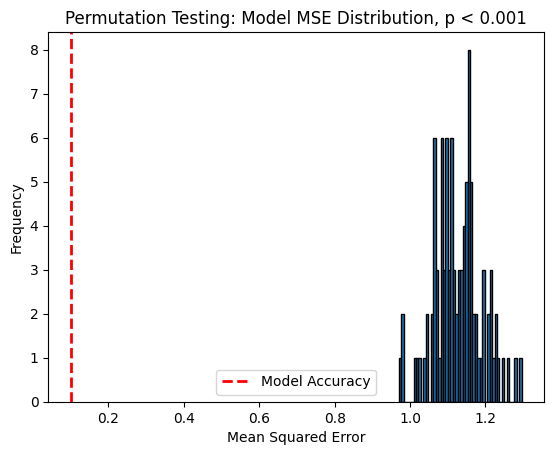

In [10]:
#permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
permuted_mse_list.sort()

result_count = count_values_greater_than(permuted_mse_list, processed_mse)
p = (100-result_count)/100
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_mse_list, bins=50, edgecolor='black')
plt.axvline(x=processed_mse, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model MSE Distribution, p < 0.001')
plt.legend()
plt.show()

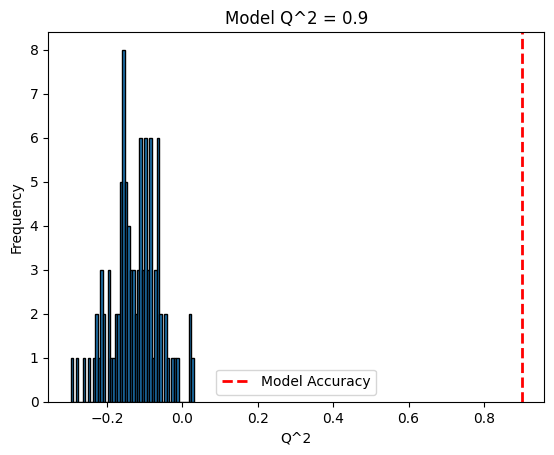

In [11]:
# Plotting the histogram
plt.hist(permuted_q2_list, bins=50, edgecolor='black')
plt.axvline(x=processed_q_squared, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Q^2')
plt.ylabel('Frequency')
plt.title(f'Model Q^2 = {np.round(processed_q_squared,3)}')
plt.legend()
plt.show()



In [12]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
df['true label'] = y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


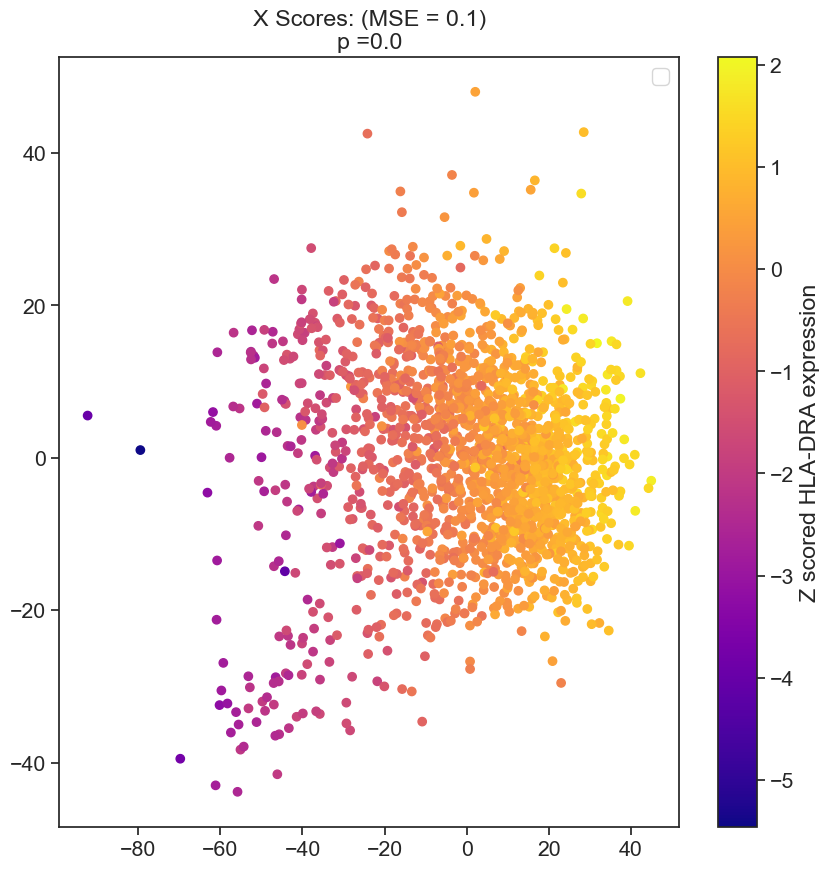

In [16]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
df['true label'] = y


plt.figure(figsize=(10,10))
plt.scatter(df['lv1'], df['lv2'], c = df['true label'], cmap = 'plasma')
plt.title(f'X Scores: (MSE = {np.round(processed_mse,3)})\np ={p_round}')
#plt.xlabel('LV1 (X_var = 93%, Yvar = 30%)')
#plt.ylabel('LV2 (X_var = 1%, Yvar = 0%)')
plt.colorbar(label="Z scored HLA-DRA expression", orientation="vertical") 

plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'VIPs for oPLSDA model')

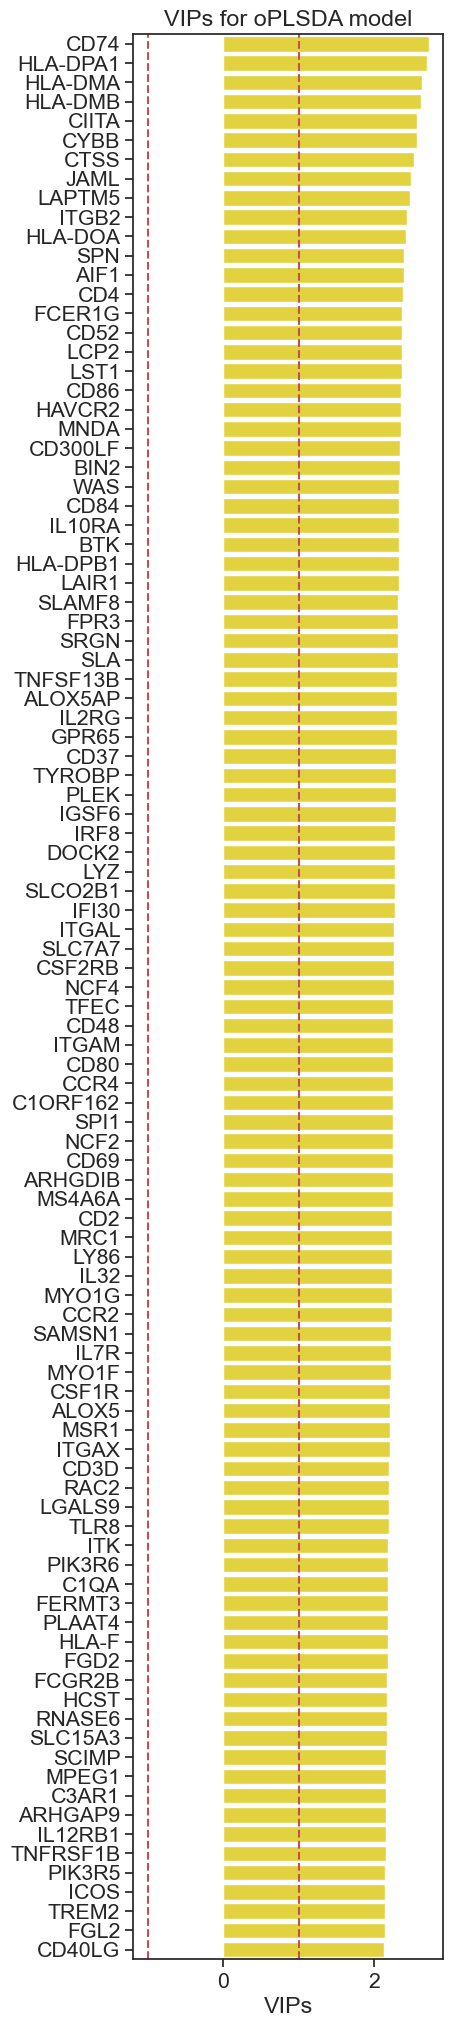

In [19]:
# just the top 100
# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(4, 25)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'high', 'low')
colors = {'high': (0.993248, 0.906157, 0.143936), 'low': (0.050383, 0.029126, 0.555194)}

loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips[:100], x=loadings_vips['VIPs'][:100],y = loadings_vips.index[:100], hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')

# with Lasso

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

from scipy.stats import zscore 




#z_score_x = zscore(X.astype(float), axis = 1, ddof=1)

# parameters to be tested on GridSearchCV


# Number of Folds and adding the random state for replication

# Initializing the Model
lassocv = LassoCV(alphas=[1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1],cv = 10)


# GridSearchCV with model, params and folds.
lassocv.fit(X,y)
lasso_feat = lassocv.coef_
selected_features = np.array(X.columns)[lasso_feat != 0]
lasso_selected_x = X.loc[:,X.columns.isin(selected_features)]


/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+00, tolerance: 1.511e-01
  model = cd_fast.enet_coordinate_descent(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.630e-01, tolerance: 1.511e-01
  model = cd_fast.enet_coordinate_descent(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

In [11]:
print(lassocv.alpha_, sum(x != 0 for x in lassocv.coef_))

0.01 159


In [12]:
selected_features

array(['ACSL4', 'ADIPOR1', 'ALG9', 'APLNR', 'APP', 'ARFGEF1', 'ARG1',
       'ARPC4', 'B2M', 'BBLN', 'BHLHE41', 'BLVRA', 'BTF3L4', 'BTN2A2',
       'C15ORF39', 'C8B', 'CAMP', 'CASP1', 'CCL18', 'CCN1', 'CCNI',
       'CCNK', 'CD74', 'CD80', 'CD9', 'CGRRF1', 'CHCHD10', 'CHMP5',
       'CHMP7', 'CIITA', 'CLEC2D', 'CPVL', 'CTDNEP1', 'CTNNBL1', 'CYBB',
       'DPYD', 'DYNLL1', 'EFNA1', 'EIF5A', 'ENPP1', 'EPC1', 'EXOSC8',
       'FBXL5', 'FCGR3A', 'FPR3', 'FUNDC2', 'FUT4', 'GCA', 'GLO1',
       'GUCD1', 'H2AJ', 'HBP1', 'HLA-B', 'HLA-C', 'HLA-DMA', 'HLA-DMB',
       'HLA-DOA', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQA2',
       'HLA-DQB1', 'HLA-DQB2', 'HLA-DRB1', 'HLA-DRB5', 'HLA-F', 'HSD11B1',
       'IL32', 'IL3RA', 'INHBA', 'INSIG1', 'IP6K2', 'IRF2BP2', 'KTN1',
       'LAPTM4A', 'LATS1', 'LBR', 'LEPROT', 'LYZ', 'MBOAT7', 'MFSD1',
       'MLF1', 'MRC1', 'MRPS16', 'MRTO4', 'MYD88', 'NAA20', 'NDUFA1',
       'NDUFB9', 'NDUFS3', 'NFAT5', 'NPIPB13', 'NTM', 'NTRK1', 'NUP93',
       'OLR1', 'P

In [13]:
X_lasso = X.loc[:,X.columns.isin(selected_features)]

In [14]:
%%time 
# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X_lasso, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_mse = mean_squared_error(y, processed_y_pred)
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
#processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X_lasso)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 1000

# List to store permutation accuracies
permuted_mse_list = []
permuted_q2_list = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X_lasso, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(2)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    #permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules

    permuted_mse = mean_squared_error(y, permuted_pred)
    permuted_q_squared = r2_score(y, permuted_pred) 
    #permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_mse_list.append(permuted_mse)
    permuted_q2_list.append(permuted_q_squared)
    


100%|██████████| 1000/1000 [00:34<00:00, 28.64it/s]

CPU times: user 1min 38s, sys: 5min 18s, total: 6min 57s
Wall time: 35.1 s


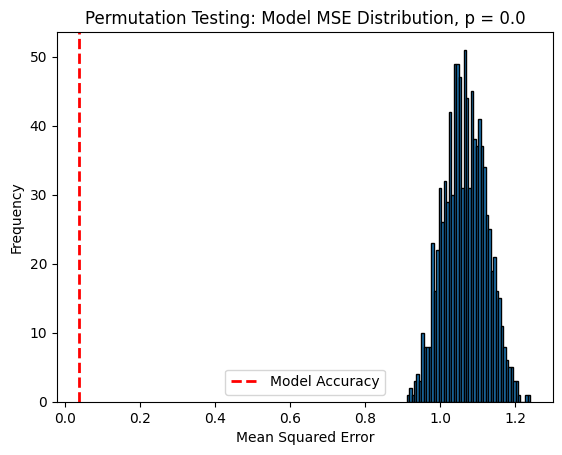

In [15]:
#permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
permuted_mse_list.sort()

result_count = count_values_greater_than(permuted_mse_list, processed_mse)
p = (1000-result_count)/1000
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_mse_list, bins=50, edgecolor='black')
plt.axvline(x=processed_mse, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model MSE Distribution, p = {p}')
plt.legend()
plt.show()

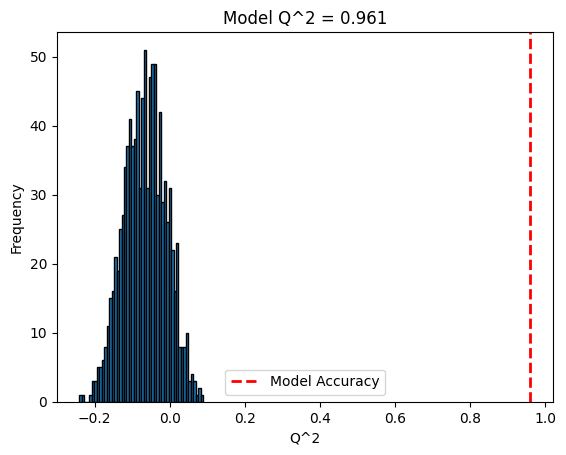

In [16]:
# Plotting the histogram
plt.hist(permuted_q2_list, bins=50, edgecolor='black')
plt.axvline(x=processed_q_squared, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Q^2')
plt.ylabel('Frequency')
plt.title(f'Model Q^2 = {np.round(processed_q_squared,3)}')
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


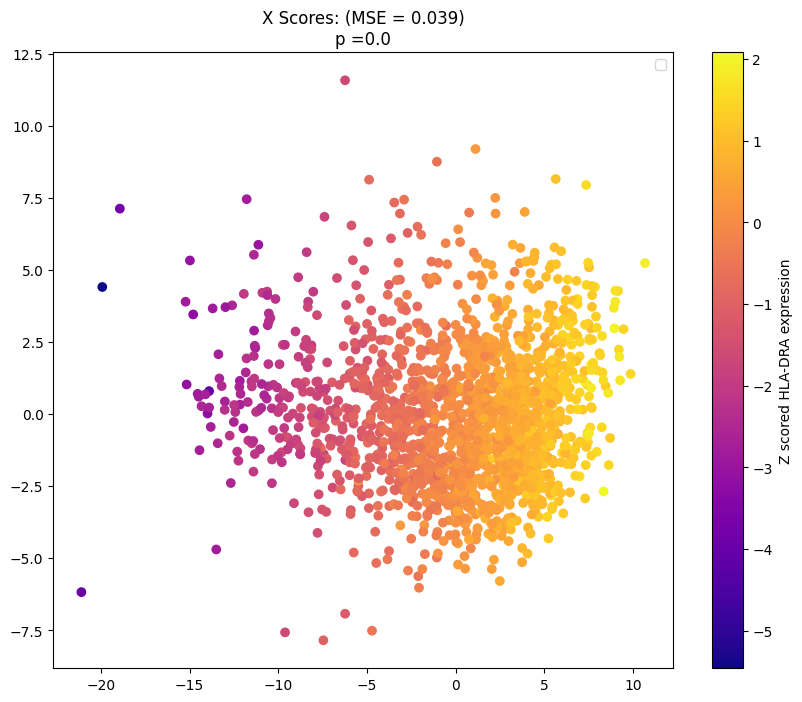

In [17]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
df['true label'] = y


plt.figure(figsize=(10,8))
plt.scatter(df['lv1'], df['lv2'], c = df['true label'], cmap = 'plasma')
plt.title(f'X Scores: (MSE = {np.round(processed_mse,3)})\np ={p_round}')
#plt.xlabel('LV1 (X_var = 93%, Yvar = 30%)')
#plt.ylabel('LV2 (X_var = 1%, Yvar = 0%)')
plt.colorbar(label="Z scored HLA-DRA expression", orientation="vertical") 

plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'VIPs for oPLSDA model')

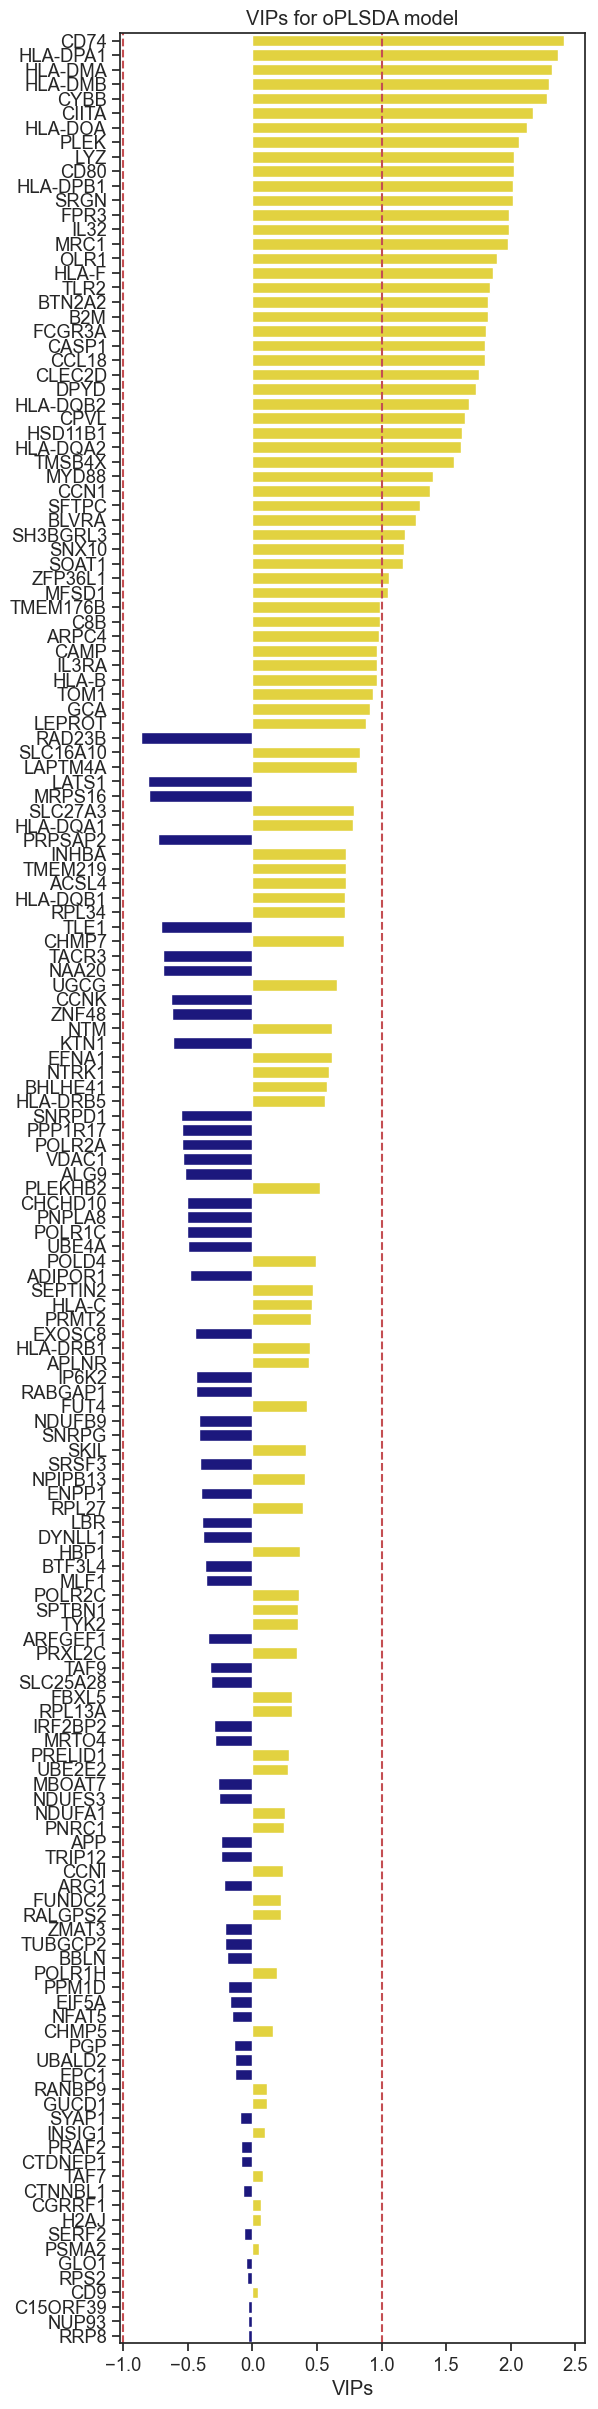

In [18]:

# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.2)
sns.set_style("ticks")
plt.figure(figsize=(6, 30)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X_lasso.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'high', 'low')
colors = {'high': (0.993248, 0.906157, 0.143936), 'low': (0.050383, 0.029126, 0.555194)}


loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips, x=loadings_vips['VIPs'],y = loadings_vips.index, hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')

In [19]:
sig_vips = loadings_vips.loc[loadings_vips['VIPs'] >=1]

Text(0.5, 1.0, 'VIPs for oPLSDA model')

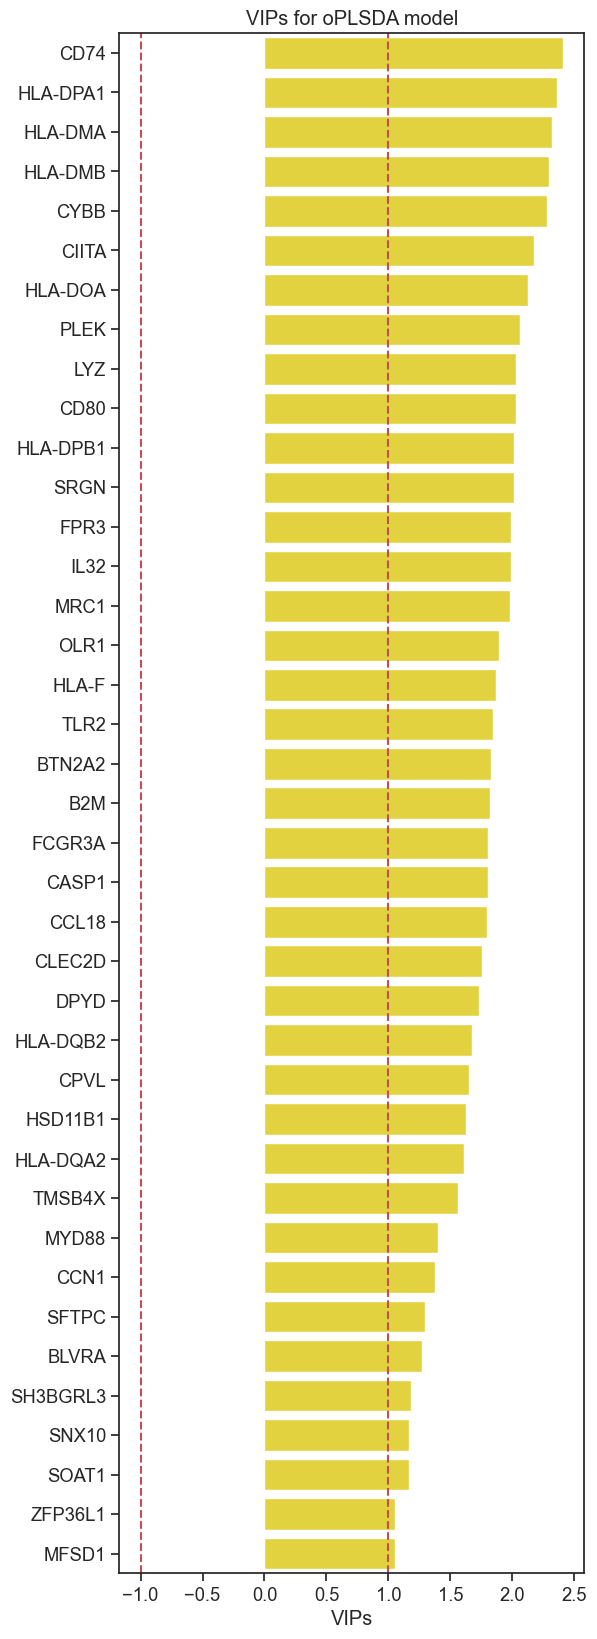

In [20]:

# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.2)
sns.set_style("ticks")
plt.figure(figsize=(6, 20)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X_lasso.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'high', 'low')
colors = {'high': (0.993248, 0.906157, 0.143936), 'low': (0.050383, 0.029126, 0.555194)}


loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sig_vips = loadings_vips.loc[loadings_vips['VIPs'] >=1]

sns.barplot(data = sig_vips, x=sig_vips['VIPs'],y = sig_vips.index, hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')

In [21]:
loadings_vips['label'] = loadings_vips['color']
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'gold', 'navy')

In [22]:
loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index

Index(['CD74', 'HLA-DPA1', 'HLA-DMA', 'HLA-DMB', 'CYBB', 'CIITA', 'HLA-DOA',
       'PLEK', 'LYZ', 'CD80', 'HLA-DPB1', 'SRGN', 'FPR3', 'IL32', 'MRC1',
       'OLR1', 'HLA-F', 'TLR2', 'BTN2A2', 'B2M', 'FCGR3A', 'CASP1', 'CCL18',
       'CLEC2D', 'DPYD', 'HLA-DQB2', 'CPVL', 'HSD11B1', 'HLA-DQA2', 'TMSB4X',
       'MYD88', 'CCN1', 'SFTPC', 'BLVRA', 'SH3BGRL3', 'SNX10', 'SOAT1',
       'ZFP36L1', 'MFSD1'],
      dtype='object')

In [23]:

grade_vips = list(X_lasso.columns)
color_dict = {}

# Iterate over the DataFrame rows
for index, row in loadings_vips.iterrows():
    color = row['color']
    color_dict[index] = color

print(color_dict)

{'CD74': 'gold', 'HLA-DPA1': 'gold', 'HLA-DMA': 'gold', 'HLA-DMB': 'gold', 'CYBB': 'gold', 'CIITA': 'gold', 'HLA-DOA': 'gold', 'PLEK': 'gold', 'LYZ': 'gold', 'CD80': 'gold', 'HLA-DPB1': 'gold', 'SRGN': 'gold', 'FPR3': 'gold', 'IL32': 'gold', 'MRC1': 'gold', 'OLR1': 'gold', 'HLA-F': 'gold', 'TLR2': 'gold', 'BTN2A2': 'gold', 'B2M': 'gold', 'FCGR3A': 'gold', 'CASP1': 'gold', 'CCL18': 'gold', 'CLEC2D': 'gold', 'DPYD': 'gold', 'HLA-DQB2': 'gold', 'CPVL': 'gold', 'HSD11B1': 'gold', 'HLA-DQA2': 'gold', 'TMSB4X': 'gold', 'MYD88': 'gold', 'CCN1': 'gold', 'SFTPC': 'gold', 'BLVRA': 'gold', 'SH3BGRL3': 'gold', 'SNX10': 'gold', 'SOAT1': 'gold', 'ZFP36L1': 'gold', 'MFSD1': 'gold', 'TMEM176B': 'gold', 'C8B': 'gold', 'ARPC4': 'gold', 'CAMP': 'gold', 'IL3RA': 'gold', 'HLA-B': 'gold', 'TOM1': 'gold', 'GCA': 'gold', 'LEPROT': 'gold', 'RAD23B': 'navy', 'SLC16A10': 'gold', 'LAPTM4A': 'gold', 'LATS1': 'navy', 'MRPS16': 'navy', 'SLC27A3': 'gold', 'HLA-DQA1': 'gold', 'PRPSAP2': 'navy', 'INHBA': 'gold', 'TMEM2

In [24]:
corr = X.corr()
corr.columns.name = ''


In [25]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

plsr_links = links[links['var1'].isin(grade_vips)]

# Correlates of the LASSO-selected features are depicted in network format. 
#Only correlation coefficients with multiple comparison corrected P values <.05 and Spearman correlation coefficients >0.3 are included. 


plsr_links_filtered=plsr_links.loc[(plsr_links['value'] > 0.80) & (plsr_links['var1'] != plsr_links['var2']) ]   # uncomment this if you only want correlated features
#plsr_links_filtered=plsr_links.loc[(plsr_links['value'] > 0.80) | (plsr_links['var1'] == plsr_links['var2']) ]    # uncomment this if you want VIPs without correlates too

In [26]:
corr_filt = corr[corr.index.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]
corr_filt = corr_filt[corr_filt.columns[corr_filt.columns.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]]
corr_filt;


In [27]:
import networkx as nx
import nxviz as nv

# Build your graph
G=nx.from_pandas_edgelist(plsr_links_filtered.loc[plsr_links_filtered['var1'].isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index))], 'var1', 'var2')
self_loops = [edge for edge in G.edges() if edge[0] == edge[1]]
G.remove_edges_from(self_loops)

color = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        color.append(color_dict[v])
    else:
        color.append('orange')
color;

node_sizes = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        node_sizes.append(50)
    else:
        node_sizes.append(2.5)
        
pos = nx.spring_layout(G, seed = 42)

/home/gh8sj/.local/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [28]:
def draw(G, pos, measures, measure_name, save = False, file=''):
    
    # for dynamic coloring related to measures of connectivity 
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
    #                               node_color=list(measures.values()),
    #                               nodelist=measures.keys())
    
    # for specific coloring I set
    color = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            color.append(color_dict[v])
        else:
            color.append('black')
    color;
    
    node_sizes = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_sizes.append(50)
        else:
            node_sizes.append(2.5)
            
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                                   node_color=list(color),
                                   nodelist=measures.keys())
    
    # 
    # log-scale colormap for better visualization and contrast
    # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    # turn labels on?
    node_labels = {}
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_labels[v] = v
        else:
            node_labels[v] = v
#            node_labels[v] = ''

    labels = nx.draw_networkx_labels(G, pos, labels = node_labels, font_color='k', font_size = 9)
    
    edges = nx.draw_networkx_edges(G, pos, width =0.15)


    plt.title(measure_name)
    #plt.colorbar()
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    if save == True:
        plt.savefig(file, bbox_inches = 'tight')
    else:
        return
    plt.show()
    

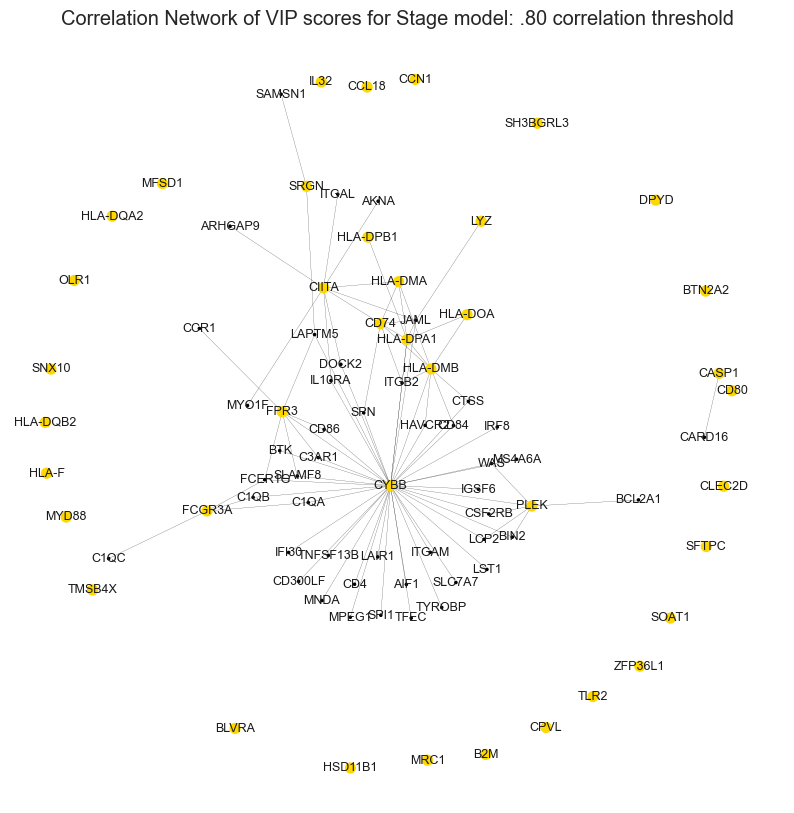

In [80]:
pos = nx.spring_layout(G, k=1.5, iterations=250)
draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model: .80 correlation threshold', save = False )#,format='pdf', bbox_inches = 'tight')
#draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model', save = True, file = '/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network.png')




#  Let's do an example PLSDA with 2 groups expressing the top 3rd and bottom 3rd of HLA-DRA

### first create the groups

In [20]:
df

,A2M,AAAS,AAK1,AAMDC,ABAT,ABCA1,ABCB1,ABCC1,ABCC3,ABCC5,...,ZNF683,ZNF703,ZNF704,ZNF706,ZNF707,ZNFX1,ZNRF1,ZSWIM6,ZWINT,ZYX
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
0051J3VD4F_FT-SA164568R_FT-SA164568D,1.66,-1.47,0.10,1.16,0.16,0.44,0.08,-0.27,0.74,-0.41,...,0.72,0.33,0.64,-0.27,-0.05,-0.14,-0.66,0.65,0.20,1.26
00A6A93BSE_SL375721_SL379539,1.03,-1.37,-0.44,-0.87,0.84,-0.37,0.57,-0.95,0.08,-1.32,...,0.73,-0.42,-0.32,-0.29,-0.97,-0.80,-1.20,0.72,-1.14,0.52
00FQA72XK2_FT-SA158516R_FT-SA158516D,0.53,-0.45,-1.28,-0.30,-0.32,-0.06,-0.29,-0.46,0.97,-0.85,...,-0.65,-0.18,-0.78,-0.77,0.27,-0.34,1.43,0.69,0.14,-0.26
00QDV6PYKZ_FT-SA202503R_FT-SA202503D,1.70,0.22,-0.47,0.74,-0.71,-0.12,0.31,-0.52,0.80,-0.90,...,0.37,-0.14,0.84,-0.12,0.02,0.19,-0.21,0.70,-1.11,1.25
00TPNTLY6Y_FT-SA172262R_FT-SA172262D,0.63,-0.73,-0.88,0.67,-0.29,-0.83,-0.79,-0.04,1.15,-0.04,...,-0.16,-0.65,1.88,-0.13,0.74,-0.62,-0.13,0.23,-0.29,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTKXAEZUGU_SL376924,-0.04,0.00,0.62,-0.20,-0.30,0.76,-0.82,-0.08,-0.87,1.11,...,0.26,1.51,-0.02,1.68,-0.95,-0.44,-0.23,-0.45,0.06,-0.33
ZVLZEUHOZY_SL542832_SL536295,-0.17,-0.39,0.28,-0.49,-0.75,0.81,-1.16,0.80,-0.34,0.21,...,0.46,1.15,0.05,0.09,0.68,0.08,0.95,-0.31,-0.11,1.66
ZWP58O13XK_SL563333_SL526853,-0.72,-0.60,-2.63,1.30,-0.65,0.16,-1.48,-0.32,0.80,-1.00,...,-1.36,-0.29,-1.42,-1.16,-0.50,0.38,0.57,0.70,1.06,0.89


In [14]:
gene_data

,HLA-DRA
SAMPLE_ID,
0051J3VD4F_FT-SA164568R_FT-SA164568D,1.27
00A6A93BSE_SL375721_SL379539,1.09
00FQA72XK2_FT-SA158516R_FT-SA158516D,-0.38
00QDV6PYKZ_FT-SA202503R_FT-SA202503D,0.70
00TPNTLY6Y_FT-SA172262R_FT-SA172262D,0.67
...,...
ZTKXAEZUGU_SL376924,0.47
ZVLZEUHOZY_SL542832_SL536295,0.24
ZWP58O13XK_SL563333_SL526853,0.43


In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def label_thirds(row):
    if row[i] >= top3 :
        val= 'Top 3rd'
    elif row[i] <= bottom3 :
        val = 'Bottom 3rd'
    else:
        val =  'Middle'
    return val


i = 'HLA-DRA' 
gene_data = df[[i]].copy()
summary = gene_data.describe(percentiles = [0, 0.33, 0.66, 1])
bottom3 = summary.values[5]
top3 = summary.values[7]
gene_data['label'] = gene_data.apply(label_thirds, axis=1)

## gene_data['label'] is my y variable

In [30]:
X = df
X = X.loc[:,~X.columns.isin(['HLA-DRA'])]
y_str = gene_data[gene_data['label'].isin(['Bottom 3rd', 'Top 3rd'])]['label']
y_str
y = y_str.apply(lambda x: 1 if x == 'Top 3rd' else -1) # convert to binary; 1 is high, -1 is low
X = X.loc[X.index.isin(y_str.index)]

100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


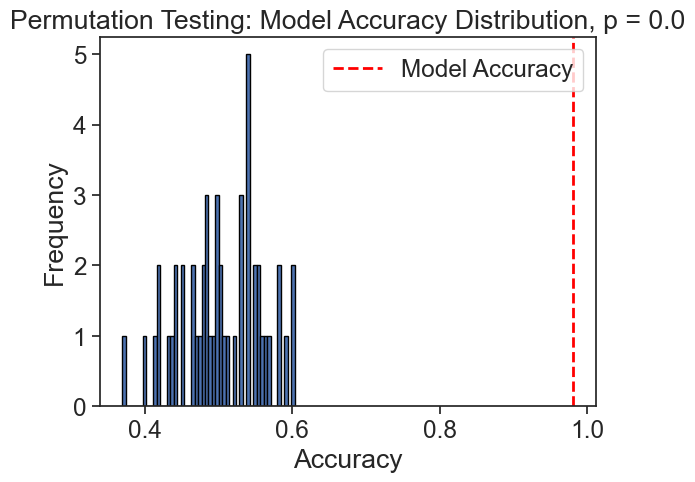

In [35]:
# plotting preferences
sns.set(font_scale = 1.6)
sns.set_style("ticks")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import bisect
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from pyopls import OPLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score


def count_values_greater_than(sorted_list, target_value):
    # Use bisect_right to find the index of the first element greater than the target_value
    index = bisect.bisect_right(sorted_list, target_value)
    
    # The count of values greater than the target_value is the length of the list minus the index
    count = len(sorted_list) - index
    
    return count

def round_to_sign(value):
    if value >= 0:
        return np.ceil(value)
    else:
        return np.floor(value)



X = X.fillna(0)
X = stats.zscore(X, ddof = 1)

# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 50

# List to store permutation accuracies
permuted_accuracies = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(1)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules


    permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_accuracies.append(permuted_accuracy)

    
permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(50))
result_count = count_values_greater_than(permuted_accuracies, processed_accuracy)
p = 1-(50-result_count)/50
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_accuracies, bins=50, edgecolor='black')
plt.axvline(x=processed_accuracy, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model Accuracy Distribution, p = {p}')
plt.legend()
plt.show()

In [39]:
from pypalettes import load_cmap
cmap = load_cmap("Andri")

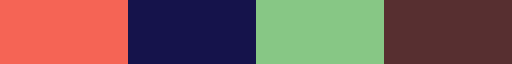

In [47]:
cmap

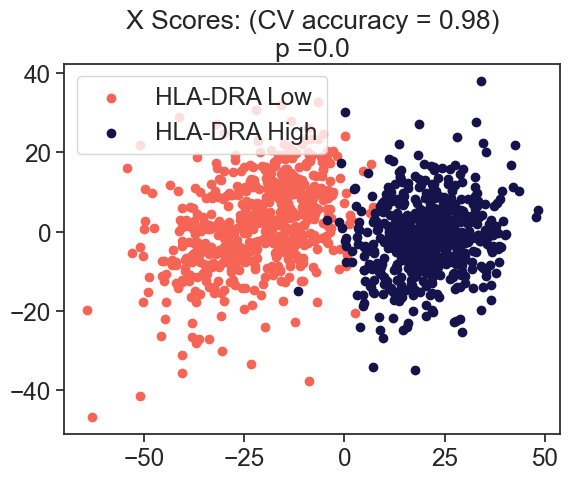

In [46]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
pos_df = df[y==1]
neg_df = df[y==-1]

plt.scatter(neg_df['lv1'], neg_df['lv2'], c=cmap.hex[0], label='HLA-DRA Low')
plt.scatter(pos_df['lv1'], pos_df['lv2'], c=cmap.hex[1], label='HLA-DRA High')
plt.title(f'X Scores: (CV accuracy = {processed_accuracy_rounded})\np ={p_round}')
#plt.xlabel(f'PC1 X_var explained = {round(np.var(df.iloc[:,0])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
#plt.ylabel(f'PC2 X_var explained = {round(np.var(df.iloc[:,1])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'VIPs for oPLSDA model')

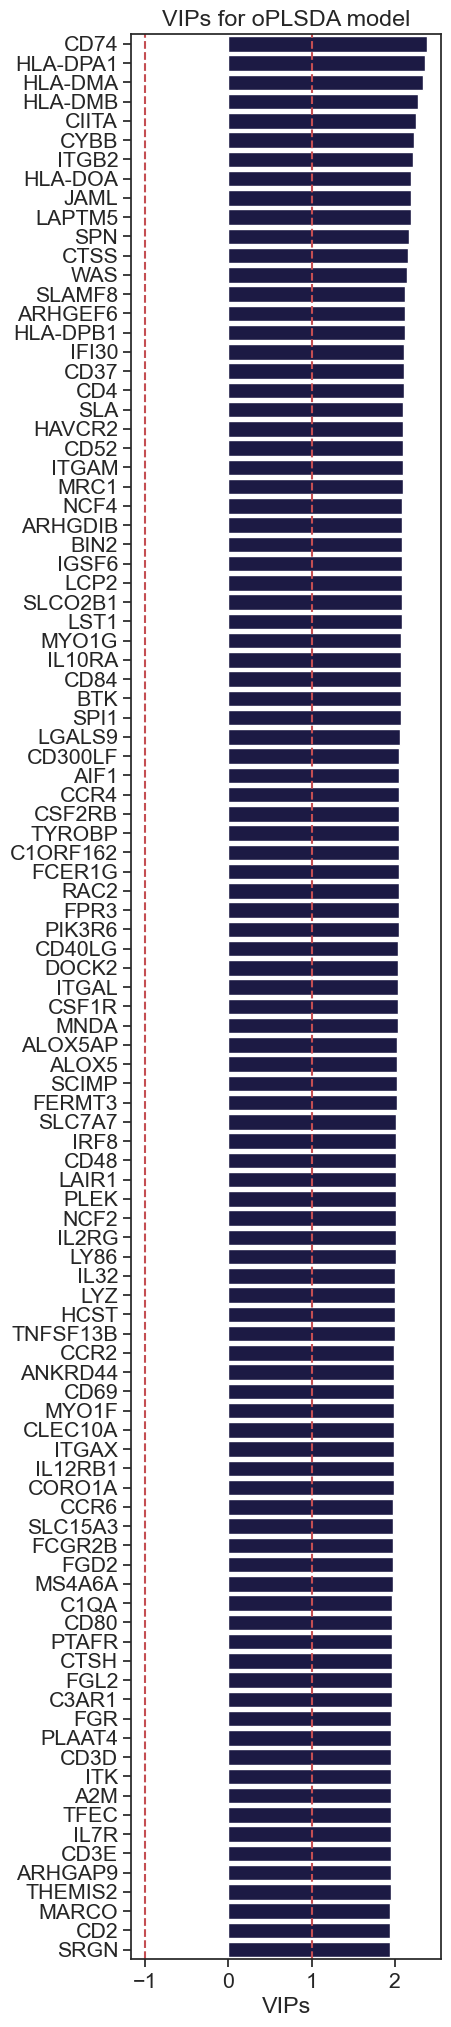

In [50]:
# just the top 100
# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(4, 25)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'HLA-DRA High', 'HLA-DRA Low')
colors = {'HLA-DRA Low': cmap.hex[0], 'HLA-DRA High': cmap.hex[1]}

loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips[:100], x=loadings_vips['VIPs'][:100],y = loadings_vips.index[:100], hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')

# And now with Lasso since there are far more variables than observations

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import bisect
from pyopls import OPLS
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

def count_values_greater_than(sorted_list, target_value):
    # Use bisect_right to find the index of the first element greater than the target_value
    index = bisect.bisect_left(sorted_list, target_value)
    
    # The count of values greater than the target_value is the length of the list minus the index
    count = len(sorted_list) - index
    
    return count

def round_to_sign(value):
    if value >= 0:
        return np.ceil(value)
    else:
        return np.floor(value)


In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

from scipy.stats import zscore 




#z_score_x = zscore(X.astype(float), axis = 1, ddof=1)

# parameters to be tested on GridSearchCV


# Number of Folds and adding the random state for replication

# Initializing the Model
lassocv = LassoCV(alphas=[1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1],cv = 10)


# GridSearchCV with model, params and folds.
lassocv.fit(X,y)
lasso_feat = lassocv.coef_
selected_features = np.array(X.columns)[lasso_feat != 0]
lasso_selected_x = X.loc[:,X.columns.isin(selected_features)]


/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+00, tolerance: 1.034e-01
  model = cd_fast.enet_coordinate_descent(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.944e-01, tolerance: 1.034e-01
  model = cd_fast.enet_coordinate_descent(
/home/gh8sj/.conda/envs/spy_cell/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

In [59]:
print(lassocv.alpha_, sum(x != 0 for x in lassocv.coef_))

0.01 279


In [60]:
selected_features

array(['ABAT', 'ADGRG3', 'ADTRP', 'AGFG1', 'AKAP12', 'AKAP13', 'ALDH1A1',
       'ALPL', 'AMACR', 'AP1B1', 'AP1S2', 'APIP', 'APOL4', 'ARAP3',
       'ARHGEF10L', 'ARL4A', 'BACH2', 'BATF3', 'BDNF', 'BHLHE41', 'BSG',
       'BST1', 'C16ORF74', 'C17ORF107', 'C19ORF38', 'CALD1', 'CALM3',
       'CAMP', 'CANT1', 'CAPZB', 'CBX1', 'CCL13', 'CCL23', 'CCL7',
       'CCND1', 'CCNE1', 'CCNK', 'CCR6', 'CD22', 'CD74', 'CDC42SE2',
       'CENPE', 'CENPS', 'CLEC4D', 'CLIP1', 'CMC1', 'CNOT6L', 'CNTRL',
       'COBLL1', 'COL4A1', 'COPA', 'CORO1C', 'COX7B', 'CPVL', 'CREG1',
       'CREM', 'CSF3R', 'CSRNP2', 'DCTN4', 'DDIT3', 'DDIT4', 'DDX3X',
       'DHRS4', 'DNAH17', 'DNAJC9', 'DRC1', 'DUSP14', 'DUSP23', 'DYNLT5',
       'ECSCR', 'EEF1AKMT1', 'EGLN2', 'EIF2AK4', 'ENO3', 'ENSA', 'ERCC3',
       'ERP29', 'ETHE1', 'FAM110A', 'FAR1', 'FBN2', 'FDPS', 'FH', 'FHIT',
       'GADD45A', 'GASK1B', 'GATM', 'GBP4', 'GGA2', 'GGH', 'GLS2', 'GRB2',
       'GSTK1', 'GTF3C6', 'GZMM', 'HADHB', 'HBS1L', 'HCAR2', 'HLA-C',


In [61]:
X_lasso = X.loc[:,X.columns.isin(selected_features)]

100%|██████████| 1000/1000 [00:30<00:00, 33.10it/s]


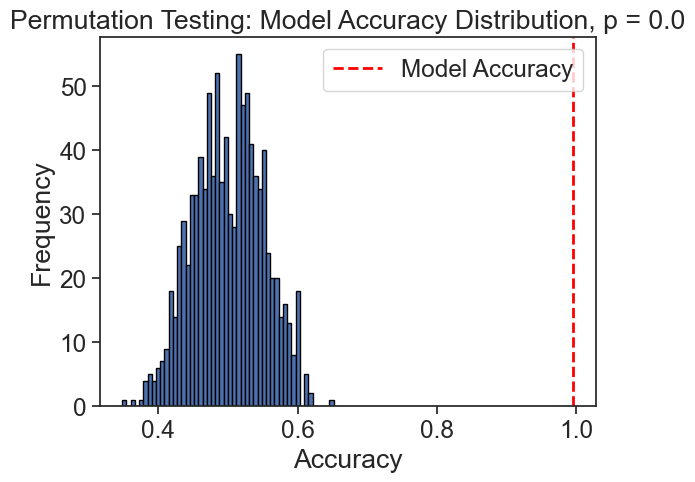

In [66]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X_lasso, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X_lasso)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 1000

# List to store permutation accuracies
permuted_accuracies = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X_lasso, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(1)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules


    permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_accuracies.append(permuted_accuracy)

    
permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
result_count = count_values_greater_than(permuted_accuracies, processed_accuracy)
p = 1-(1000-result_count)/1000
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_accuracies, bins=50, edgecolor='black')
plt.axvline(x=processed_accuracy, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model Accuracy Distribution, p = {p}')
plt.legend()
plt.show()

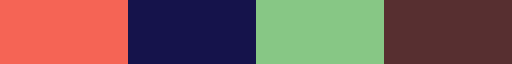

In [67]:
from pypalettes import load_cmap
cmap = load_cmap("Andri")
cmap

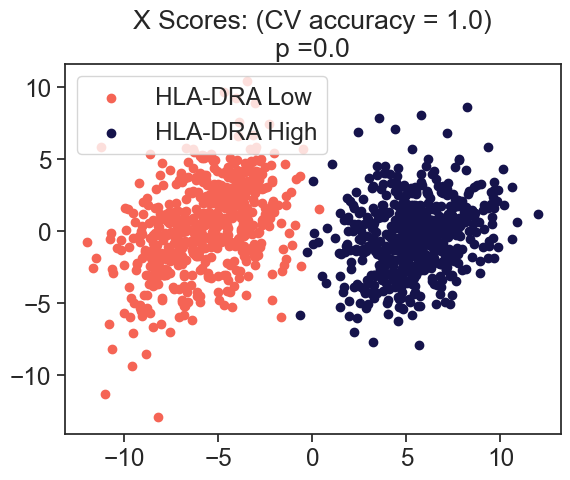

In [68]:
#plt.figure(1)
#df = pd.DataFrame(np.column_stack([pls_model.x_scores_, opls.T_ortho_[:, 0]]),
#                  index=y.index, columns=['t', 't_ortho'])                
df = pd.DataFrame(np.column_stack([pls_model.x_scores_]),
                  index=y.index, columns=['lv1', 'lv2'])       
pos_df = df[y==1]
neg_df = df[y==-1]

plt.scatter(neg_df['lv1'], neg_df['lv2'], c=cmap.hex[0], label='HLA-DRA Low')
plt.scatter(pos_df['lv1'], pos_df['lv2'], c=cmap.hex[1], label='HLA-DRA High')
plt.title(f'X Scores: (CV accuracy = {processed_accuracy_rounded})\np ={p_round}')
#plt.xlabel(f'PC1 X_var explained = {round(np.var(df.iloc[:,0])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
#plt.ylabel(f'PC2 X_var explained = {round(np.var(df.iloc[:,1])/sum(np.var(df.iloc[:,:], axis = None)), 3)}')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'VIPs for oPLSDA model')

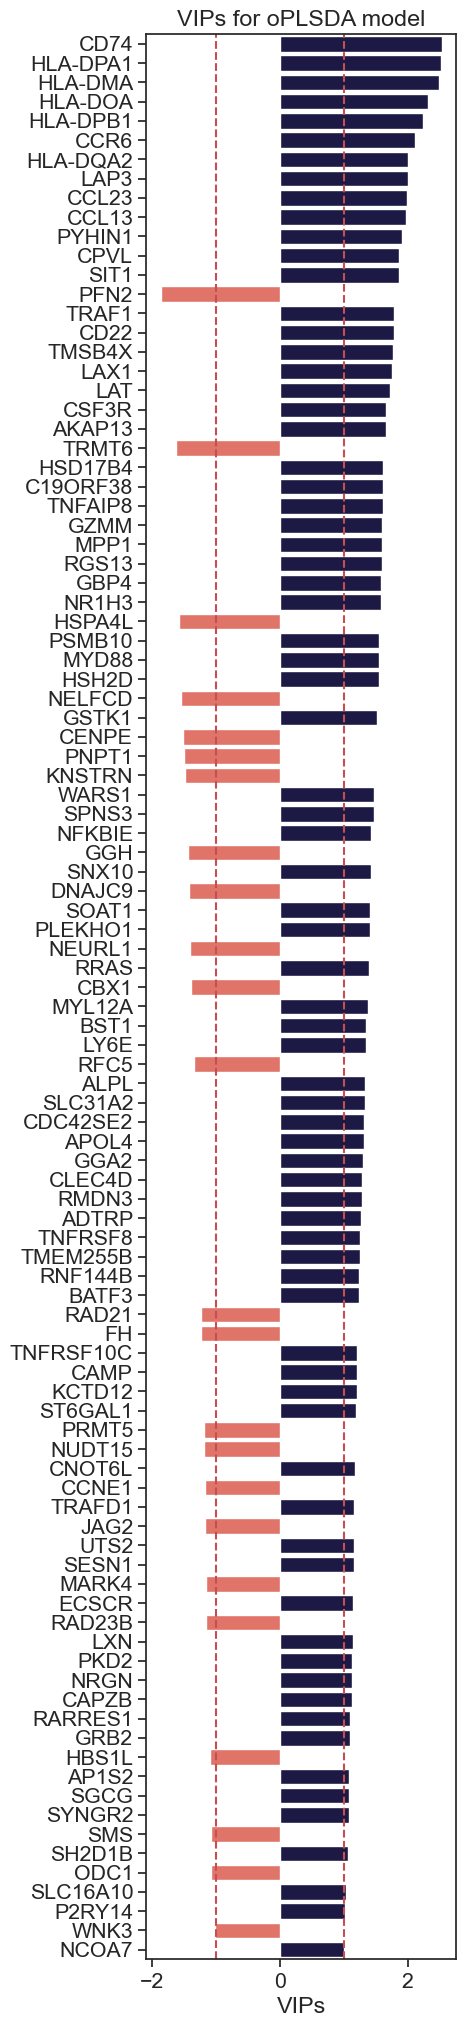

In [70]:
# just the top 100
# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)
sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(4, 25)) 


loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X_lasso.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'HLA-DRA High', 'HLA-DRA Low')
colors = {'HLA-DRA Low': cmap.hex[0], 'HLA-DRA High': cmap.hex[1]}

loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips[:100], x=loadings_vips['VIPs'][:100],y = loadings_vips.index[:100], hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')

In [71]:
loadings_vips['label'] = loadings_vips['color']
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, cmap.hex[1], cmap.hex[0])

In [72]:
loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index

Index(['CD74', 'HLA-DPA1', 'HLA-DMA', 'HLA-DOA', 'HLA-DPB1', 'CCR6',
       'HLA-DQA2', 'LAP3', 'CCL23', 'CCL13',
       ...
       'SGCG', 'SYNGR2', 'SMS', 'SH2D1B', 'ODC1', 'SLC16A10', 'P2RY14', 'WNK3',
       'NCOA7', 'TMEM219'],
      dtype='object', length=101)

In [73]:

grade_vips = list(X_lasso.columns)
color_dict = {}

# Iterate over the DataFrame rows
for index, row in loadings_vips.iterrows():
    color = row['color']
    color_dict[index] = color

print(color_dict)

{'CD74': '#15134BFF', 'HLA-DPA1': '#15134BFF', 'HLA-DMA': '#15134BFF', 'HLA-DOA': '#15134BFF', 'HLA-DPB1': '#15134BFF', 'CCR6': '#15134BFF', 'HLA-DQA2': '#15134BFF', 'LAP3': '#15134BFF', 'CCL23': '#15134BFF', 'CCL13': '#15134BFF', 'PYHIN1': '#15134BFF', 'CPVL': '#15134BFF', 'SIT1': '#15134BFF', 'PFN2': '#F56455FF', 'TRAF1': '#15134BFF', 'CD22': '#15134BFF', 'TMSB4X': '#15134BFF', 'LAX1': '#15134BFF', 'LAT': '#15134BFF', 'CSF3R': '#15134BFF', 'AKAP13': '#15134BFF', 'TRMT6': '#F56455FF', 'HSD17B4': '#15134BFF', 'C19ORF38': '#15134BFF', 'TNFAIP8': '#15134BFF', 'GZMM': '#15134BFF', 'MPP1': '#15134BFF', 'RGS13': '#15134BFF', 'GBP4': '#15134BFF', 'NR1H3': '#15134BFF', 'HSPA4L': '#F56455FF', 'PSMB10': '#15134BFF', 'MYD88': '#15134BFF', 'HSH2D': '#15134BFF', 'NELFCD': '#F56455FF', 'GSTK1': '#15134BFF', 'CENPE': '#F56455FF', 'PNPT1': '#F56455FF', 'KNSTRN': '#F56455FF', 'WARS1': '#15134BFF', 'SPNS3': '#15134BFF', 'NFKBIE': '#15134BFF', 'GGH': '#F56455FF', 'SNX10': '#15134BFF', 'DNAJC9': '#F56455

In [74]:
corr = X.corr()
corr.columns.name = ''


In [75]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

plsr_links = links[links['var1'].isin(grade_vips)]

# Correlates of the LASSO-selected features are depicted in network format. 
#Only correlation coefficients with multiple comparison corrected P values <.05 and Spearman correlation coefficients >0.3 are included. 


plsr_links_filtered=plsr_links.loc[(plsr_links['value'] > 0.80) & (plsr_links['var1'] != plsr_links['var2']) ]   # uncomment this if you only want correlated features
#plsr_links_filtered=plsr_links.loc[(plsr_links['value'] > 0.80) | (plsr_links['var1'] == plsr_links['var2']) ]    # uncomment this if you want VIPs without correlates too

In [76]:
corr_filt = corr[corr.index.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]
corr_filt = corr_filt[corr_filt.columns[corr_filt.columns.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]]
corr_filt;


In [77]:
import networkx as nx
import nxviz as nv

# Build your graph
G=nx.from_pandas_edgelist(plsr_links_filtered.loc[plsr_links_filtered['var1'].isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index))], 'var1', 'var2')
self_loops = [edge for edge in G.edges() if edge[0] == edge[1]]
G.remove_edges_from(self_loops)

color = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        color.append(color_dict[v])
    else:
        color.append('orange')
color;

node_sizes = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        node_sizes.append(50)
    else:
        node_sizes.append(2.5)
        
pos = nx.spring_layout(G, seed = 42)

/home/gh8sj/.local/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [100]:
def draw(G, pos, measures, measure_name, save = False, file=''):
    
    # for dynamic coloring related to measures of connectivity 
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
    #                               node_color=list(measures.values()),
    #                               nodelist=measures.keys())
    
    # for specific coloring I set
    color = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            color.append(color_dict[v])
        else:
            color.append('black')
    color;
    
    node_sizes = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_sizes.append(50)
        else:
            node_sizes.append(2.5)
            
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                                   node_color=list(color),
                                   nodelist=measures.keys())
    
    # 
    # log-scale colormap for better visualization and contrast
    # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    # turn labels on?
    node_labels = {}
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_labels[v] = v
        else:
            node_labels[v] = v
#            node_labels[v] = ''

    labels = nx.draw_networkx_labels(G, pos, labels = node_labels, font_color='k', font_size = 9)
    
    edges = nx.draw_networkx_edges(G, pos, width =0.15)


    plt.title(measure_name)
    #plt.colorbar()
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(15, 8)
    if save == True:
        plt.savefig(file, bbox_inches = 'tight')
    else:
        return
    plt.show()
    

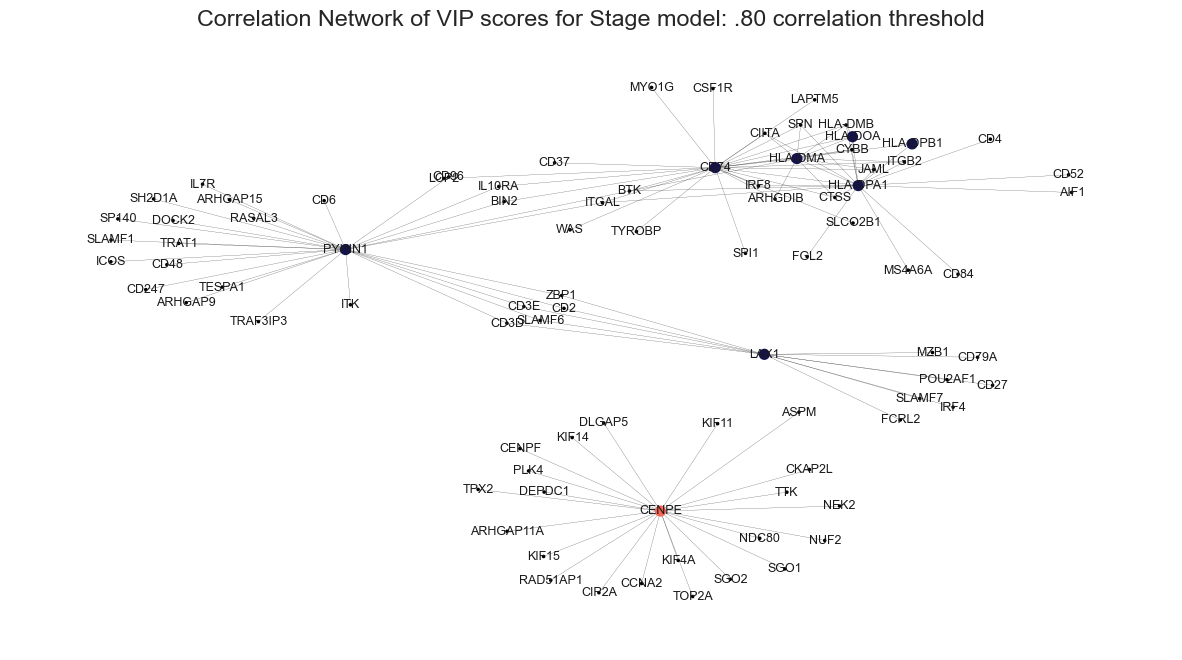

In [102]:
pos = nx.spring_layout(G, k=1.1, iterations=250)
draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model: .80 correlation threshold', save = False )#,format='pdf', bbox_inches = 'tight')
#draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model', save = True, file = '/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network.png')


